In [82]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib as plt
%matplotlib inline



In [156]:
df = pd.read_csv("conversion_data.csv")

In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
df.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [6]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [7]:
df.total_pages_visited.value_counts()

2     43868
3     43829
4     41046
1     40739
5     36308
6     30261
7     23488
8     17522
9     12157
10     8074
11     5394
12     3615
13     2425
14     1811
15     1325
16     1100
17      845
18      722
19      565
20      405
21      296
22      180
23      113
24       46
25       39
26       17
27        7
29        2
28        1
Name: total_pages_visited, dtype: int64

In [9]:
df.new_user.value_counts()

1    216744
0     99456
Name: new_user, dtype: int64

In [10]:
df.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [12]:
df.age.value_counts()

30     14346
28     14341
29     14158
27     14084
26     13931
31     13692
32     13507
25     13460
24     12960
33     12631
23     12336
34     12108
22     11701
35     11471
21     10966
36     10779
20     10156
37      9761
19      9349
38      8970
18      8466
39      8202
17      7597
40      7148
41      6401
42      5588
43      4904
44      4224
45      3634
46      2994
47      2504
48      2121
49      1629
50      1356
51      1093
52       935
53       627
54       520
55       394
56       286
57       247
58       165
59       127
60        94
61        71
62        59
63        35
64        27
65        15
66         9
67         5
68         5
69         3
70         2
77         1
79         1
111        1
73         1
72         1
123        1
Name: age, dtype: int64

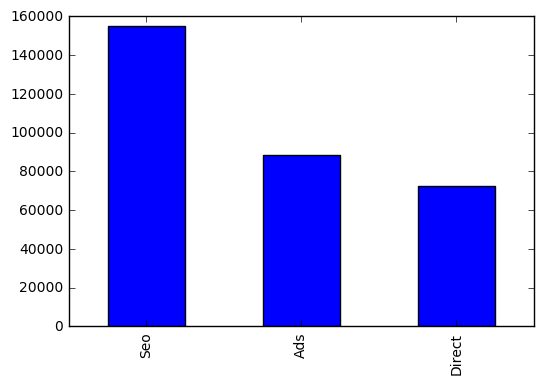

In [76]:
df.source.value_counts().plot(kind='bar')

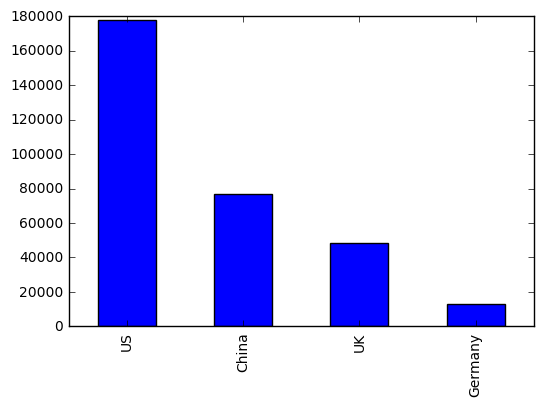

In [50]:
df.country.value_counts().plot(kind='bar')

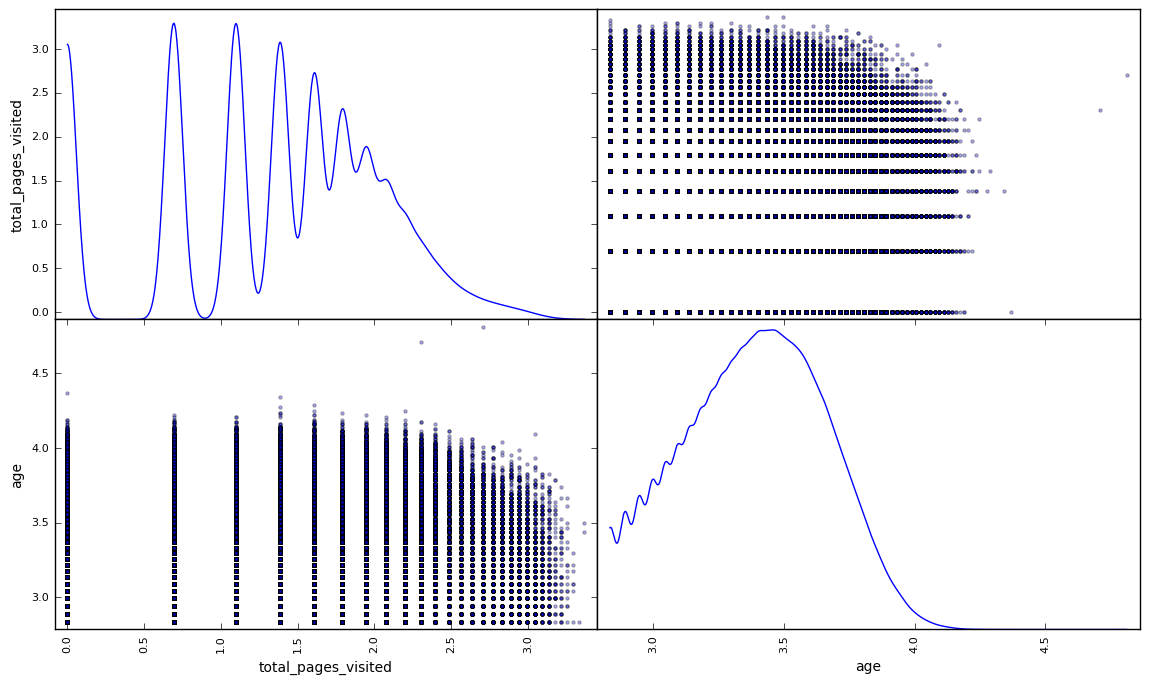

In [51]:
pd.scatter_matrix(np.log(df[['total_pages_visited','age']]), alpha = 0.3, figsize = (14,8), diagonal = 'kde');

                          age  new_user  total_pages_visited  converted
age                  1.000000  0.012343            -0.045922  -0.088797
new_user             0.012343  1.000000            -0.082541  -0.152374
total_pages_visited -0.045922 -0.082541             1.000000   0.528994
converted           -0.088797 -0.152374             0.528994   1.000000


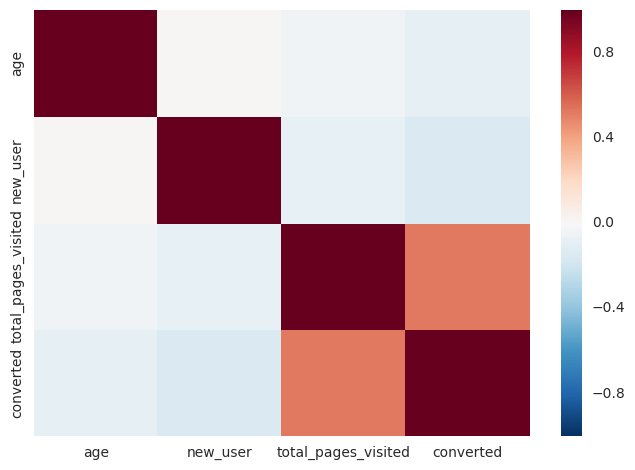

In [162]:
import seaborn as sns

corr = df.corr()
print corr 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [78]:
df = pd.get_dummies(df, columns = ["country","source"])

In [135]:
df.head(1)

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0


In [137]:
Xtrain,Xtest,ytrain,ytest = train_test_split(df.drop('converted',axis=1),df.converted)

In [139]:
 Xtrain.head(1)

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
34171,31,1,1,0,0,0,1,0,0,1


In [140]:
clf = RandomForestClassifier()
clf.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [144]:
from sklearn.metrics import classification_report

print classification_report(ytest,clf.predict(Xtest))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99     76415
          1       0.82      0.68      0.74      2635

avg / total       0.98      0.98      0.98     79050



In [151]:
features = pd.DataFrame([clf.feature_importances_ ], columns=Xtrain.columns,index=[1])

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
1,0.11636,0.038758,0.807173,0.022308,0.002093,0.003362,0.002926,0.002028,0.002304,0.002687


In [155]:
features.iloc[0].sort_values(ascending=False)

total_pages_visited    0.807304
age                    0.113209
new_user               0.041613
country_China          0.018753
country_UK             0.005032
country_US             0.003629
source_Direct          0.002872
source_Ads             0.002763
source_Seo             0.002619
country_Germany        0.002204
Name: 1, dtype: float64

In [167]:
df = pd.read_csv("conversion_data.csv")
df = pd.get_dummies(df, columns = ["country","source"])
Xtrain,Xtest,ytrain,ytest = train_test_split(df.drop(['converted',"total_pages_visited"],axis=1),df.converted)

In [178]:
clf = RandomForestClassifier(class_weight={1:0.9,0:0.1})
clf.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [179]:
print classification_report(ytest,clf.predict(Xtest))

             precision    recall  f1-score   support

          0       0.98      0.90      0.94     76520
          1       0.14      0.45      0.21      2530

avg / total       0.95      0.89      0.92     79050



In [173]:
Xtrain.head(1)

,age,new_user,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
36485,33,0,0,0,1,0,0,1,0


In [184]:
f_importances = pd.DataFrame([clf.feature_importances_ ], columns=Xtrain.columns,index=[1])
f_importances.iloc[0].sort_values(ascending=False)

new_user           0.451387
age                0.255323
country_China      0.212151
country_US         0.028229
country_UK         0.023822
country_Germany    0.018194
source_Direct      0.004556
source_Ads         0.003568
source_Seo         0.002770
Name: 1, dtype: float64

In [186]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence


fig, axs = plot_partial_dependence(clf, Xtrain, Xtrain.columns.values) 

ValueError: gbrt has to be an instance of BaseGradientBoosting